# Final Project – FINA 4900

The primary objective of this project is to develop a model (or models) that maximizes predictive accuracy in forecasting a firm’s stock returns. The project encompasses a set of 30 selected tickers, with the core task being the computation of stock returns using various methods. The ultimate goal is to construct a robust model that optimally predicts future stock returns.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yf
from datetime import date
import requests
from bs4 import BeautifulSoup

## Data Scraping

Scraping the tickers from https://bullishbears.com/dow-jones-stocks-list/

In [2]:
url="https://bullishbears.com/dow-jones-stocks-list/"
headers={
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0 Safari/537.36"
}

In [3]:
html_data=requests.get(url, headers=headers).text
soup=BeautifulSoup(html_data, "html.parser")
soup

<!DOCTYPE html>
 <html lang="en-US"> <head><script>if(navigator.userAgent.match(/MSIE|Internet Explorer/i)||navigator.userAgent.match(/Trident\/7\..*?rv:11/i)){var e=document.location.href;if(!e.match(/[?&]nonitro/)){if(e.indexOf("?")==-1){if(e.indexOf("#")==-1){document.location.href=e+"?nonitro=1"}else{document.location.href=e.replace("#","?nonitro=1#")}}else{if(e.indexOf("#")==-1){document.location.href=e+"&nonitro=1"}else{document.location.href=e.replace("#","&nonitro=1#")}}}}</script><link href="https://www.googletagmanager.com" rel="preconnect"/><link href="https://cdn-ggnil.nitrocdn.com" rel="preconnect"/><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1" name="viewport"/><meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots"/><title>Dow Jones Stocks List: Top Index of Companies in 2024</title><meta content="This Dow Jones stocks list includes companies such as 1. [AAPL] Apple Inc., 2. [MSFT] Microsoft, 

In [4]:
table=soup.find("table")
tickers=[]
if table:
    rows=table.find_all("tr")[1:]
    for row in rows:
        cols=row.find_all("td")
        tickers.append(cols[0].text.strip())
tickers

['AAPL',
 'MSFT',
 'UNH',
 'V',
 'JNJ',
 'WMT',
 'JPM',
 'PG',
 'HD',
 'CVX',
 'KO',
 'DIS',
 'CSCO',
 'VZ',
 'NKE',
 'MRK',
 'INTC',
 'CRM',
 'MCD',
 'AXP',
 'AMGN',
 'HON',
 'CAT',
 'IBM',
 'GS',
 'BA',
 'MMM',
 'DOW',
 'TRV',
 'WBA']

Creating a pandas dataframe table for all tickers

In [5]:
start_date=date(2010,1,1)
end_date=date(2023,12,31)
dailyprc=yf.download(tickers,start_date, end_date)['Adj Close']
dailyprc

[*********************100%***********************]  30 of 30 completed


Ticker,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04 00:00:00+00:00,6.447414,40.591290,32.906178,43.777546,39.883930,18.622328,16.475376,43.600765,27.715311,NaN,...,21.558411,23.300684,13.578012,39.432011,34.862862,25.203190,19.785185,14.697929,22.702427,13.113415
2010-01-05 00:00:00+00:00,6.458559,40.239662,32.833805,45.211361,40.360744,18.542683,16.401966,43.909603,27.646177,NaN,...,21.645788,23.308208,13.632027,39.444920,34.036968,25.163235,19.558468,14.724426,22.519846,12.982840
2010-01-06 00:00:00+00:00,6.355828,39.937275,33.364555,46.582813,40.483360,18.510324,16.295204,43.915131,27.499260,NaN,...,21.937033,23.165167,13.548921,39.257820,33.554028,25.411018,19.295843,14.301044,22.349426,12.953820
2010-01-07 00:00:00+00:00,6.344077,39.571579,33.905689,48.468552,40.646858,18.428192,16.368608,43.749672,27.507900,NaN,...,21.971983,22.924250,13.681893,39.044922,34.036968,26.386215,19.475416,14.215921,22.483322,12.961076
2010-01-08 00:00:00+00:00,6.386254,39.923210,33.881439,48.001015,41.103249,18.455570,16.455345,43.826889,27.551113,NaN,...,21.960342,23.082346,13.654885,38.993294,33.987988,26.138428,19.529285,14.224882,22.513756,12.895785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00+00:00,192.656174,275.825714,183.374313,260.440002,285.776489,265.162842,48.510948,144.811356,90.602005,52.239307,...,105.677666,371.799713,106.217964,141.751053,182.480576,512.289185,256.469635,35.147900,24.237406,51.712521
2023-12-26 00:00:00+00:00,192.108856,275.573303,183.759705,262.790009,290.963318,265.043396,48.694958,146.115204,90.532326,52.798470,...,105.608986,371.879120,106.198288,142.395020,183.747513,512.013550,257.194122,35.138515,24.597919,51.633289
2023-12-27 00:00:00+00:00,192.208359,278.126190,184.846664,262.100006,293.413971,265.541168,48.849915,145.635849,89.964943,52.798470,...,105.952415,371.293518,105.323303,142.512100,185.250198,514.730957,256.965851,34.979141,24.625648,52.118561


In [6]:
dailyprc=dailyprc.drop(columns=['DOW']) #dropping as it's missing values
dailyprc

Ticker,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04 00:00:00+00:00,6.447414,40.591290,32.906178,43.777546,39.883930,18.622328,16.475376,43.600765,27.715311,133.307663,...,21.558411,23.300684,13.578012,39.432011,34.862862,25.203190,19.785185,14.697929,22.702427,13.113415
2010-01-05 00:00:00+00:00,6.458559,40.239662,32.833805,45.211361,40.360744,18.542683,16.401966,43.909603,27.646177,135.664581,...,21.645788,23.308208,13.632027,39.444920,34.036968,25.163235,19.558468,14.724426,22.519846,12.982840
2010-01-06 00:00:00+00:00,6.355828,39.937275,33.364555,46.582813,40.483360,18.510324,16.295204,43.915131,27.499260,134.216568,...,21.937033,23.165167,13.548921,39.257820,33.554028,25.411018,19.295843,14.301044,22.349426,12.953820
2010-01-07 00:00:00+00:00,6.344077,39.571579,33.905689,48.468552,40.646858,18.428192,16.368608,43.749672,27.507900,136.842896,...,21.971983,22.924250,13.681893,39.044922,34.036968,26.386215,19.475416,14.215921,22.483322,12.961076
2010-01-08 00:00:00+00:00,6.386254,39.923210,33.881439,48.001015,41.103249,18.455570,16.455345,43.826889,27.551113,134.255051,...,21.960342,23.082346,13.654885,38.993294,33.987988,26.138428,19.529285,14.224882,22.513756,12.895785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22 00:00:00+00:00,192.656174,275.825714,183.374313,260.440002,285.776489,265.162842,48.510948,144.811356,90.602005,371.647156,...,105.677666,371.799713,106.217964,141.751053,182.480576,512.289185,256.469635,35.147900,24.237406,51.712521
2023-12-26 00:00:00+00:00,192.108856,275.573303,183.759705,262.790009,290.963318,265.043396,48.694958,146.115204,90.532326,372.584503,...,105.608986,371.879120,106.198288,142.395020,183.747513,512.013550,257.194122,35.138515,24.597919,51.633289
2023-12-27 00:00:00+00:00,192.208359,278.126190,184.846664,262.100006,293.413971,265.541168,48.849915,145.635849,89.964943,375.386627,...,105.952415,371.293518,105.323303,142.512100,185.250198,514.730957,256.965851,34.979141,24.625648,52.118561


Resampling to monthly to calculate monthly returns

In [7]:
monthlyprc=dailyprc.resample('M').last()
monthlyprc

Ticker,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31 00:00:00+00:00,5.786131,41.125744,30.416588,47.221783,35.828365,15.817282,14.993992,39.773422,25.537497,114.545395,...,22.239939,21.215296,13.245572,39.994541,35.464798,26.378229,18.413656,13.180969,21.941631,12.919968
2010-02-28 00:00:00+00:00,6.164523,39.810696,30.844622,49.552628,39.127262,16.912420,16.235140,40.254303,26.998014,120.692116,...,21.482691,21.685120,14.045503,41.118671,36.808636,27.065660,19.171974,12.961436,21.537376,13.074720
2010-03-31 00:00:00+00:00,7.079770,42.082161,33.469398,56.966694,43.105160,18.530237,17.369537,42.219711,30.169678,131.715378,...,21.984283,22.154068,15.332565,41.112183,37.985912,26.114449,20.464636,13.897815,22.668026,13.520481
2010-04-30 00:00:00+00:00,7.865777,40.302952,37.411758,56.825459,46.990261,21.305416,17.970102,45.343174,31.837612,112.085037,...,20.624609,23.099527,15.835312,40.701771,35.732395,24.250267,20.284788,13.148170,21.482374,13.043857
2010-05-31 00:00:00+00:00,7.738943,36.414013,32.341858,50.645100,41.931671,21.536888,15.454414,41.512482,28.881998,111.637894,...,19.829994,19.602394,15.098925,40.001160,34.838039,23.258175,16.314114,12.520335,19.657619,12.366306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31 00:00:00+00:00,186.708115,246.880493,155.481812,224.029999,275.269836,220.481216,55.143818,152.844101,83.025131,317.353333,...,105.446053,324.668274,99.326042,149.646454,156.504318,465.824554,243.298370,32.109333,22.855263,53.481377
2023-09-30 00:00:00+00:00,170.151169,258.842194,146.821518,191.679993,267.309296,201.883759,51.691921,159.978714,80.415710,313.344208,...,100.290665,312.771576,93.691986,141.424347,159.516525,494.729919,227.780273,29.750240,20.083014,52.599941
2023-10-31 00:00:00+00:00,169.713882,246.264114,144.302155,186.820007,222.481659,199.942383,50.486637,138.261780,80.951477,294.014984,...,100.047134,334.920654,100.697815,146.385666,163.550583,525.511230,232.820953,32.935329,19.035519,53.744488


In [8]:
monthlyrets=monthlyprc.pct_change()
monthlyrets

Ticker,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-28 00:00:00+00:00,0.065396,-0.031976,0.014072,0.049360,0.092075,0.069237,0.082776,0.012091,0.057191,0.053662,...,-0.034049,0.022146,0.060392,0.028107,0.037892,0.026061,0.041182,-0.016655,-0.018424,0.011978
2010-03-31 00:00:00+00:00,0.148470,0.057057,0.085097,0.149620,0.101666,0.095659,0.069873,0.048825,0.117478,0.091334,...,0.023349,0.021625,0.091635,-0.000158,0.031984,-0.035145,0.067425,0.072243,0.052497,0.034093
2010-04-30 00:00:00+00:00,0.111022,-0.042279,0.117790,-0.002479,0.090131,0.149765,0.034576,0.073981,0.055285,-0.149036,...,-0.061848,0.042677,0.032789,-0.009983,-0.059325,-0.071385,-0.008788,-0.053940,-0.052305,-0.035252
2010-05-31 00:00:00+00:00,-0.016125,-0.096493,-0.135516,-0.108760,-0.107652,0.010864,-0.139993,-0.084482,-0.092834,-0.003989,...,-0.038528,-0.151394,-0.046503,-0.017213,-0.025029,-0.040911,-0.195746,-0.047751,-0.084942,-0.051944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31 00:00:00+00:00,-0.042384,0.103638,-0.064484,-0.062047,0.060188,-0.015777,0.102037,-0.006182,-0.058612,-0.071452,...,0.021847,-0.022226,-0.078630,-0.012540,-0.065929,-0.058830,0.035385,0.026408,-0.140295,0.020819
2023-09-30 00:00:00+00:00,-0.088678,0.048451,-0.055700,-0.144400,-0.028919,-0.084349,-0.062598,0.046679,-0.031429,-0.012633,...,-0.048891,-0.036643,-0.056723,-0.054944,0.019247,0.062052,-0.063782,-0.073471,-0.121296,-0.016481
2023-10-31 00:00:00+00:00,-0.002570,-0.048594,-0.017159,-0.025355,-0.167700,-0.009616,-0.023317,-0.135749,0.006662,-0.061687,...,-0.002428,0.070816,0.074775,0.035081,0.025289,0.062218,0.022130,0.107061,-0.052158,0.021759


After calculating the monthly returns, we look at the averages and standard deviations for each ticker

In [9]:
mean_returns = monthlyrets.mean()
std_dev_returns = monthlyrets.std()
statistics = pd.DataFrame({
    "Average Return": mean_returns,
    "Standard Deviation": std_dev_returns
})
statistics

,Average Return,Standard Deviation
Ticker,,
AAPL,0.024222,0.078783
AMGN,0.013548,0.064005
AXP,0.013343,0.070227
BA,0.015229,0.098509
CAT,0.016232,0.086224
CRM,0.020884,0.090864
CSCO,0.009759,0.073115
CVX,0.010263,0.072834
DIS,0.010353,0.075422


## Part I – Portfolio Analysis

- We create overlapping 3-year windows, starting from 2010 all the way to 2023 (2010-2012, 2011-2013...2021-2023)

In [10]:
start_year=2010
end_year=2023
windows=[]
for year in range(start_year, end_year-1): 
    windows.append((f"{year}-01-01", f"{year+2}-12-31"))
windows

[('2010-01-01', '2012-12-31'),
 ('2011-01-01', '2013-12-31'),
 ('2012-01-01', '2014-12-31'),
 ('2013-01-01', '2015-12-31'),
 ('2014-01-01', '2016-12-31'),
 ('2015-01-01', '2017-12-31'),
 ('2016-01-01', '2018-12-31'),
 ('2017-01-01', '2019-12-31'),
 ('2018-01-01', '2020-12-31'),
 ('2019-01-01', '2021-12-31'),
 ('2020-01-01', '2022-12-31'),
 ('2021-01-01', '2023-12-31')]

Using the overlapping 3-year windows we calculate the weights on each stock to achieve:
- Minimum variance portfolio in a simulation
- Max Sharpe portfolio in a simulation
- Max Sharpe portfolio analytically
- Max Sharpe portfolio analytically with the constraint that each weight must be positive and no weight can be bigger than 10%
- GMV portfolio analytically

In [11]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import date
import pandas_datareader.data as pdr
from scipy.optimize import minimize

In [12]:
results = []
np.random.seed(100)

for start_date, end_date in windows:
    window_data = monthlyrets.loc[start_date:end_date]
    window_data = window_data.dropna(axis=1) #Drop stocks with NaNs
    N = window_data.shape[1] #Number of stocks
    if N == 0:
        continue  #Skip window if no data
    mu_vec = np.array(window_data.mean() * 12) #Annualized mean returns
    cov_mat = np.array(window_data.cov() * 12) #Annualized covariance matrix

# Simulation
    num_simul = 10000
    port_expret = np.empty(num_simul)
    port_var = np.empty(num_simul)
    weights = np.empty((num_simul, N))
    
#Simulated portfolios
    for i in range(num_simul):
        temp = np.random.rand(N)
        weights[i] = temp / temp.sum()
        port_expret[i] = np.dot(weights[i].T, mu_vec) #Expected Return
        port_var[i] = np.dot(weights[i].T, np.dot(cov_mat, weights[i])) #Variance
    port_sd = np.sqrt(port_var)  #Portfolio Risk (Standard Deviation)

#Risk-Free Rate from FED   
    rf_data = pdr.DataReader('DGS10', 'fred', start_date, end_date).dropna()
    rf = rf_data['DGS10'].mean() / 100

#Sharpe Ratios
    sharpes = (port_expret - rf) / port_sd
    
#Step a: Minimum Variance Portfolio (Simulated)
    min_risk_idx = port_sd.argmin()
    min_risk_weights_sim = weights[min_risk_idx]

#Step b: Max Sharpe Portfolio (Simulated)
    max_sharpe_idx = sharpes.argmax()
    max_sharpe_weights_sim = weights[max_sharpe_idx]

#Step c: Max Sharpe Portfolio (Analytical)
    def portsd_func(weights, covmat):
        return np.sqrt(np.dot(weights.T, np.dot(covmat, weights)))
    def neg_sharpe(weights, muret, covmat, rf):
        return -1 * ((np.dot(weights.T, muret) - rf) / portsd_func(weights, covmat))
    
    initial_weights = np.ones(N) / N
    constraints = {'type': 'eq', 'fun': lambda w: np.sum(w) - 1}
    bounds = None
    max_sharpe_results = minimize(
        neg_sharpe, initial_weights, args=(mu_vec, cov_mat, rf),
        method='SLSQP', constraints=constraints, bounds=bounds
    )
    max_sharpe_weights = max_sharpe_results.x

#Step d: Max Sharpe Portfolio (Analytical with Constraints)
    bounds_constrained = [(0, 0.1) for _ in range(N)]
    max_sharpe_results_constrained = minimize(
        neg_sharpe, initial_weights, args=(mu_vec, cov_mat, rf),
        method='SLSQP', constraints=constraints, bounds=bounds_constrained
    )
    max_sharpe_weights_constrained = max_sharpe_results_constrained.x

#Step e: GMV Portfolio (Analytical)
    ones = np.ones(N)
    try:
        cov_inv = np.linalg.inv(cov_mat)
    except np.linalg.LinAlgError:
        cov_inv = np.linalg.pinv(cov_mat)
    gmv_weights = cov_inv.dot(ones) / ones.dot(cov_inv).dot(ones)

#Create DataFrame
    weights_df = pd.DataFrame({
        'Ticker': window_data.columns,
        'Min Risk Sim Weights': min_risk_weights_sim,
        'Max Sharpe Sim Weights': max_sharpe_weights_sim,
        'Max Sharpe Analytical Weights': max_sharpe_weights,
        'Max Sharpe Constrained Weights': max_sharpe_weights_constrained,
        'GMV Weights': gmv_weights,
    })
    weights_df['Window_Start'] = start_date
    weights_df['Window_End'] = end_date
    weights_df = weights_df[
        ['Window_Start', 'Window_End', 'Ticker', 'Min Risk Sim Weights',
         'Max Sharpe Sim Weights', 'Max Sharpe Analytical Weights',
         'Max Sharpe Constrained Weights', 'GMV Weights']
    ]

    results.append(weights_df)

results_df = pd.concat(results)
results_df

,Window_Start,Window_End,Ticker,Min Risk Sim Weights,Max Sharpe Sim Weights,Max Sharpe Analytical Weights,Max Sharpe Constrained Weights,GMV Weights
0,2011-01-01,2013-12-31,AAPL,0.050532,0.029074,0.174128,8.329795e-02,0.033442
1,2011-01-01,2013-12-31,AMGN,0.061399,0.012637,0.101831,1.000000e-01,-0.007475
2,2011-01-01,2013-12-31,AXP,0.011542,0.033801,0.525839,7.739170e-02,0.025242
3,2011-01-01,2013-12-31,BA,0.033938,0.071148,0.008674,0.000000e+00,0.265787
4,2011-01-01,2013-12-31,CAT,0.022274,0.000608,-0.188970,0.000000e+00,-0.191863
...,...,...,...,...,...,...,...,...
24,2021-01-01,2023-12-31,UNH,0.056678,0.030867,0.310879,1.000000e-01,-0.214863
25,2021-01-01,2023-12-31,V,0.022121,0.007071,0.702236,1.765916e-13,-0.174426
26,2021-01-01,2023-12-31,VZ,0.057483,0.002913,0.366942,7.087197e-14,0.357078
27,2021-01-01,2023-12-31,WBA,0.034568,0.040570,-1.484310,2.251021e-13,-0.252294


- We now imagine that in the end of each three-year window, one had invested in the analytically derived Max Sharpe portfolio using the prior three-years of data. What would their return be over the next three years? How close would it be to the new Max Sharpe portfolio the next three years? 

In [13]:
performance_results = []
for i in range(len(windows) - 1):
    start_date, end_date = windows[i]
    next_end_date = windows[i + 1][1]
    prior_weights = results[i]['Max Sharpe Analytical Weights']
    
#Returns for the next 3-year period (2013-2015)
    next_window_data = monthlyrets.loc[f"{end_date.split('-')[0]}-01-01":next_end_date]
    next_returns = np.array(next_window_data.mean() * 12) #Annualized mean returns
    
#Portfolio return using prior window's weights
    prior_portfolio_return = np.dot(prior_weights.T, next_returns)
    
#Actual Max Sharpe portfolio for the next period (2013-2015)
    next_mu_vec = np.array(next_window_data.mean() * 12)
    next_cov_mat = np.array(next_window_data.cov() * 12)
    
#Optimization for Max Sharpe ratio for the next period
    max_sharpe_results_next = minimize(
        neg_sharpe, np.ones(len(next_mu_vec)) / len(next_mu_vec), 
        args=(next_mu_vec, next_cov_mat, rf), method='SLSQP', 
        constraints={'type': 'eq', 'fun': lambda w: np.sum(w) - 1}, 
        bounds=[(0, 1) for _ in range(len(next_mu_vec))]
    )
    next_max_sharpe_weights = max_sharpe_results_next.x
    next_max_sharpe_return = np.dot(next_max_sharpe_weights.T, next_returns)

    performance_results.append({
        'Window': f"{start_date} to {end_date}",
        'Next Period': f"{end_date.split('-')[0]}-01-01 to {next_end_date}",
        'Prior Portfolio Return': prior_portfolio_return,
        'Actual Max Sharpe Return': next_max_sharpe_return,
        'Difference': next_max_sharpe_return - prior_portfolio_return
    })

performance_df = pd.DataFrame(performance_results)
performance_df

,Window,Next Period,Prior Portfolio Return,Actual Max Sharpe Return,Difference
0,2010-01-01 to 2012-12-31,2012-01-01 to 2013-12-31,0.451403,0.329427,-0.121976
1,2011-01-01 to 2013-12-31,2013-01-01 to 2014-12-31,1.929771,0.300291,-1.629480
2,2012-01-01 to 2014-12-31,2014-01-01 to 2015-12-31,1772.842024,0.257490,-1772.584533
3,2013-01-01 to 2015-12-31,2015-01-01 to 2016-12-31,0.521549,0.245996,-0.275553
4,2014-01-01 to 2016-12-31,2016-01-01 to 2017-12-31,1.017459,0.251053,-0.766406
5,2015-01-01 to 2017-12-31,2017-01-01 to 2018-12-31,0.533325,0.266991,-0.266335
6,2016-01-01 to 2018-12-31,2018-01-01 to 2019-12-31,0.653720,0.284659,-0.369061
7,2017-01-01 to 2019-12-31,2019-01-01 to 2020-12-31,0.585839,0.398992,-0.186846
8,2018-01-01 to 2020-12-31,2020-01-01 to 2021-12-31,1.195237,0.375613,-0.819624
9,2019-01-01 to 2021-12-31,2021-01-01 to 2022-12-31,2832.182521,0.366252,-2831.816269


### VaR Analysis

To proceed, we conduct a VaR analysis on an equally weighted portfolio of the 30 stocks for the entire
sample period, using three methods: Parametric, Historical, and Monte Carlo.

In [14]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.stats import norm

In [15]:
days = 30
portfolio_value = 100
threshold_levels = [0.1, 0.05, 0.01]

In [16]:
lnret = np.log(dailyprc / dailyprc.shift(1)).dropna()
N = len(lnret.columns)
ew = np.ones(N) / N 

In [17]:
hist_ret_ew = (ew * lnret).sum(axis=1)
hist_mean = hist_ret_ew.mean()
hist_sd = hist_ret_ew.std()
hist_Nday_ret = hist_ret_ew.rolling(days).sum()
hist_Nday_ret_dollars = hist_Nday_ret * portfolio_value

In [18]:
VaR_dict = {
    "Confidence Level": [],
    "Parametric VaR": [],
    "Historical VaR": [],
    "Monte Carlo VaR": []
}

#### Parametric VaR

In [19]:
for alpha in threshold_levels:
    z = norm.ppf(alpha)  # Z-score for the confidence level
    parametric_var = (hist_mean * days - abs(z) * hist_sd * np.sqrt(days)) * portfolio_value
    VaR_dict['Confidence Level'].append(alpha)
    VaR_dict['Parametric VaR'].append(parametric_var)

#### Historical VaR

In [20]:
for alpha in threshold_levels:
    historical_var = np.nanpercentile(hist_Nday_ret_dollars, alpha * 100)
    VaR_dict['Historical VaR'].append(historical_var)

#### Monte Carlo VaR

In [21]:
np.random.seed(100)
numsims = 10000
simulated_values = np.zeros(numsims)

for i in range(numsims):
    z = np.random.normal(0, 1)
    simulated_var = (hist_mean * days - abs(z) * hist_sd * np.sqrt(days)) * portfolio_value
    simulated_values[i] = simulated_var
for alpha in threshold_levels:
    monte_carlo_var = np.nanpercentile(simulated_values, alpha * 100)
    VaR_dict['Monte Carlo VaR'].append(monte_carlo_var)

In [22]:
VaR_results_df = pd.DataFrame(VaR_dict)
VaR_results_df

,Confidence Level,Parametric VaR,Historical VaR,Monte Carlo VaR
0,0.10,-5.988154,-4.139019,-8.146461
1,0.05,-8.093684,-6.651283,-9.968850
2,0.01,-12.043309,-12.412397,-13.760968


## Part II – Sentiment and Language Analysis

In [23]:
import time as tm
import pandas as pd
from bs4 import BeautifulSoup
import requests
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/noalugiai/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [24]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'
}

In [25]:
all_data = []
for ticker in tickers:
    try:
        url = f"https://finviz.com/quote.ashx?t={ticker}"
        tm.sleep(1)
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.content, 'html.parser')
        news_table = soup.find('table', id='news-table')

        sentences = []
        dates = []
        times = []

        for row in news_table.find_all('tr'):
            timestamp = row.td.text.strip()
            if len(timestamp.split(' ')) == 2:
                date, time = timestamp.split(' ')
            else:
                time = timestamp
            if row.a:
                sentence = row.a.text.strip()
                dates.append(date)
                times.append(time)
                sentences.append(sentence)

        for i, sentence in enumerate(sentences):
            scores = sia.polarity_scores(sentence)
            all_data.append({
                "Ticker": ticker,
                "Title": sentence,
                "Date": dates[i],
                "Time": times[i],
                "Compound": scores['compound']
            })

    except Exception as e:
        print(f"Error processing {ticker}: {e}")

final_df = pd.DataFrame(all_data)
final_df

,Ticker,Title,Date,Time,Compound
0,AAPL,Magnificent Seven Stocks: Nvidia Stock Sells O...,Today,02:57PM,0.5994
1,AAPL,Apple Remains the 'Top Pick' at Morgan Stanley...,Today,01:15PM,0.2023
2,AAPL,3 reasons quantum computing could be a 'game-c...,Today,01:10PM,0.0000
3,AAPL,Apple and Google must prepare to remove TikTok...,Today,01:06PM,-0.1027
4,AAPL,"Nvidia Poised to Hit $250 Share Price by 2025,...",Today,12:45PM,0.4939
...,...,...,...,...,...
2995,WBA,Walgreens and Dion's Chicago Dream Join Forces...,Oct-22-24,02:56PM,0.7845
2996,WBA,Walmart is taking on Amazon with prescription ...,Oct-22-24,12:41PM,0.1779
2997,WBA,Walgreens Collects More than 6-Million Pounds ...,Oct-22-24,12:31PM,0.4019
2998,WBA,ASML's Latest Chapter in the Semiconductor Story,Oct-22-24,10:54AM,0.0000


- We download the daily stock price of the DOW30 companies for the period that starts Jan 1, 2024 and ends Dec 31, 2024. We then calculate the daily return for each company

In [26]:
import yfinance as yf
import pandas as pd
tickers = dailyprc.columns.tolist()
start_date = "2024-01-01"
end_date = "2024-12-31"
daily_prices_2024 = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
daily_prices_2024 = daily_prices_2024.dropna()
daily_prices_2024

[*********************100%***********************]  29 of 29 completed


Ticker,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-02 00:00:00+00:00,184.734970,288.667664,186.081879,251.759995,288.089417,254.997986,48.917702,143.306198,90.293434,379.116241,...,111.113640,368.117218,104.753090,145.126999,188.000168,531.025879,256.906281,36.451057,24.634893,52.584026
2024-01-03 00:00:00+00:00,183.351746,291.870880,184.115433,243.910004,279.812134,250.726913,49.298347,146.038513,91.229118,372.760254,...,112.614914,367.849274,102.285423,144.248871,187.882309,533.674377,256.023041,36.713562,23.636557,52.587326
2024-01-04 00:00:00+00:00,181.023178,294.278168,185.523163,244.940002,281.583771,250.129593,48.878670,144.437469,90.144119,373.892792,...,114.812866,365.209015,100.574760,145.039185,189.100128,537.012085,257.640686,36.910446,22.425610,52.078949
2024-01-05 00:00:00+00:00,180.296707,294.113129,187.426575,249.000000,284.369049,250.010101,48.888428,144.188217,90.482559,377.300232,...,115.018913,365.020416,100.358475,143.839050,189.620697,529.096069,257.720093,37.688595,23.118900,51.732330
2024-01-08 00:00:00+00:00,184.655365,301.762024,187.575287,229.000000,287.636688,259.717041,49.249550,143.325409,91.129578,379.662964,...,115.175911,371.908905,101.872505,145.078217,188.874268,528.249329,260.548462,37.594841,23.692019,52.240707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-09 00:00:00+00:00,246.750000,277.630005,296.720001,157.039993,399.260010,351.570007,58.950001,157.080002,114.610001,594.119995,...,103.790001,446.019989,77.639999,170.789993,250.869995,560.619995,308.299988,42.360001,8.850000,93.830002
2024-12-10 00:00:00+00:00,247.770004,275.750000,302.109985,164.100006,388.390015,348.820007,58.720001,157.000000,114.730003,585.030029,...,101.000000,443.329987,76.739998,172.279999,247.649994,565.190002,312.380005,42.299999,10.420000,94.550003
2024-12-11 00:00:00+00:00,246.490005,273.410004,302.339996,165.960007,388.869995,354.850006,58.590000,156.210007,114.610001,592.559998,...,99.750000,448.989990,78.849998,170.630005,245.139999,533.530029,313.790009,41.990002,9.840000,94.959999


In [27]:
daily_returns_2024 = daily_prices_2024.pct_change().dropna()
daily_returns_2024

Ticker,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-03 00:00:00+00:00,-0.007488,0.011097,-0.010568,-0.031180,-0.028732,-0.016749,0.007781,0.019066,0.010363,-0.016765,...,0.013511,-0.000728,-0.023557,-0.006051,-0.000627,0.004988,-0.003438,0.007202,-0.040525,0.000063
2024-01-04 00:00:00+00:00,-0.012700,0.008248,0.007646,0.004223,0.006332,-0.002382,-0.008513,-0.010963,-0.011893,0.003038,...,0.019517,-0.007178,-0.016724,0.005479,0.006482,0.006254,0.006318,0.005363,-0.051232,-0.009667
2024-01-05 00:00:00+00:00,-0.004013,-0.000561,0.010260,0.016575,0.009891,-0.000478,0.000200,-0.001726,0.003754,0.009113,...,0.001795,-0.000516,-0.002150,-0.008275,0.002753,-0.014741,0.000308,0.021082,0.030915,-0.006656
2024-01-08 00:00:00+00:00,0.024175,0.026007,0.000793,-0.080321,0.011491,0.038826,0.007387,-0.005984,0.007151,0.006262,...,0.001365,0.018872,0.015086,0.008615,-0.003936,-0.001600,0.010975,-0.002488,0.024790,0.009827
2024-01-09 00:00:00+00:00,-0.002263,-0.011644,-0.012896,-0.014148,0.000137,0.001802,-0.010900,-0.025418,-0.020535,-0.013167,...,0.008945,0.002936,-0.008493,0.004103,-0.000572,0.003448,0.003009,-0.010016,-0.010534,0.006698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-09 00:00:00+00:00,0.016101,0.018527,-0.023915,0.020204,0.010708,-0.028785,-0.015695,0.011853,-0.018162,-0.009272,...,0.006790,0.005523,-0.015845,-0.017432,-0.035344,0.023926,-0.008714,-0.000236,0.033878,-0.019540
2024-12-10 00:00:00+00:00,0.004134,-0.006772,0.018165,0.044957,-0.027225,-0.007822,-0.003902,-0.000509,0.001047,-0.015300,...,-0.026881,-0.006031,-0.011592,0.008724,-0.012835,0.008152,0.013234,-0.001416,0.177401,0.007673
2024-12-11 00:00:00+00:00,-0.005166,-0.008486,0.000761,0.011335,0.001236,0.017287,-0.002214,-0.005032,-0.001046,0.012871,...,-0.012376,0.012767,0.027495,-0.009577,-0.010135,-0.056017,0.004514,-0.007329,-0.055662,0.004336


We build a scatterplot where the y-axis is the return on day t+1 and the x-axis is the average compound score for the news headlines on day t:
- What is the correlation between return on day t+1 and the average compound score for the news headlines on day t?
- If a company has good news headlines today, is the stock return higher tomorrow?

In [28]:
final_df = final_df[final_df['Date'] != 'Today']
final_df['Date'] = pd.to_datetime(final_df['Date'], errors='coerce').dt.date

'''
I removed rows with 'Today' in the 'Date' column because they were causing parsing errors
when converting to datetime format. I first filtered out 'Today' and directly converted all the rest,
this way only valid dates are processed, preventing errors.
'''

/var/folders/0x/s4sr5ykj5d1gxgn6bhdnsjf80000gn/T/ipykernel_5678/121286805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Date'] = pd.to_datetime(final_df['Date'], errors='coerce').dt.date


"\nI removed rows with 'Today' in the 'Date' column because they were causing parsing errors\nwhen converting to datetime format. I first filtered out 'Today' and directly converted all the rest,\nthis way only valid dates are processed, preventing errors.\n"

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

final_df['Date'] = pd.to_datetime(final_df['Date']).dt.date
daily_returns_2024 = daily_prices_2024.pct_change().dropna()
daily_returns_2024 = daily_returns_2024.reset_index()
daily_returns_2024['Date'] = daily_returns_2024['Date'].dt.date

/var/folders/0x/s4sr5ykj5d1gxgn6bhdnsjf80000gn/T/ipykernel_5678/455903120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Date'] = pd.to_datetime(final_df['Date']).dt.date


In [30]:
daily_returns_2024['Date'] = daily_returns_2024['Date'] - pd.Timedelta(days=1)
returns_melted = daily_returns_2024.melt(id_vars=['Date'], var_name='Ticker', value_name='Return')
merged_data = pd.merge(final_df, returns_melted, on=['Ticker', 'Date'])
merged_data

,Ticker,Title,Date,Time,Compound,Return
0,AAPL,Speculation grows about MediaTek cutting into ...,2024-12-12,10:31PM,-0.1280,0.000121
1,AAPL,Apple's slimmest iPhone yet may pave way for f...,2024-12-12,08:56PM,0.0000,0.000121
2,AAPL,Apple may work with Broadcom for AI server chips,2024-12-12,08:27PM,0.0000,0.000121
3,AAPL,"Warner Discovery to Restructure, Setting Up Po...",2024-12-12,06:51PM,0.3818,0.000121
4,AAPL,'Fast Money' traders talk Apple's record close,2024-12-12,06:08PM,0.0000,0.000121
...,...,...,...,...,...,...
2200,WBA,Walgreens and Dion's Chicago Dream Join Forces...,2024-10-22,02:56PM,0.7845,-0.039054
2201,WBA,Walmart is taking on Amazon with prescription ...,2024-10-22,12:41PM,0.1779,-0.039054
2202,WBA,Walgreens Collects More than 6-Million Pounds ...,2024-10-22,12:31PM,0.4019,-0.039054
2203,WBA,ASML's Latest Chapter in the Semiconductor Story,2024-10-22,10:54AM,0.0000,-0.039054


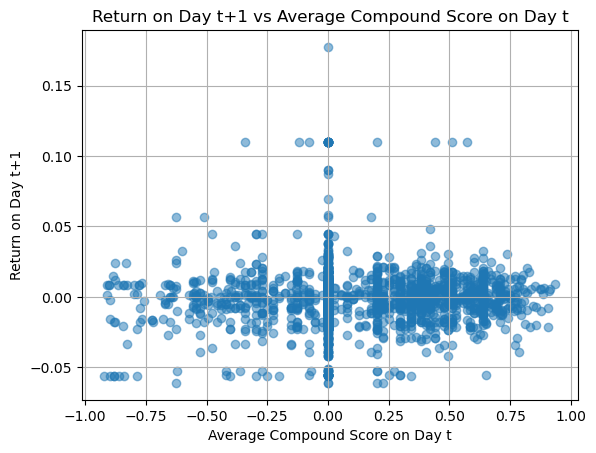

In [31]:
plt.scatter(merged_data['Compound'], merged_data['Return'], alpha=0.5)
plt.title('Return on Day t+1 vs Average Compound Score on Day t')
plt.xlabel('Average Compound Score on Day t')
plt.ylabel('Return on Day t+1')
plt.grid(True)
plt.show()

- To make it even more easy to interpret, I will calculate the correlation between the variables

In [32]:
correlation = merged_data[['Compound', 'Return']].corr().iloc[0, 1]
correlation

0.03775051883968194

### SEC Filings

- We obtain each company’s 10-K filing for the year 2020 from the SEC Edgar website

In [33]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
import lxml
import re
from collections import Counter
import nltk
import string
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import time
import os
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/noalugiai/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [34]:
headers = {'User-Agent': 'George Washington University, lugiai_noa03@gwu.edu'}

In [35]:
mapping_url = 'https://www.sec.gov/files/company_tickers.json'

In [36]:
response = requests.get(mapping_url, headers=headers)
if response.status_code == 200:
    ticker_cik_data = response.json()
    # The JSON is a dictionary with numerical keys; extract tickers and CIKs
    ticker_cik_dict = {}
    for item in ticker_cik_data.values():
        ticker = item['ticker'].upper()
        cik_str = str(item['cik_str']).lstrip('0')  # Remove leading zeros
        ticker_cik_dict[ticker] = cik_str

In [37]:
ticker_cik = {}
for ticker in tickers:
    cik = ticker_cik_dict.get(ticker.upper())
    if cik:
        ticker_cik[ticker.upper()] = cik
    else:
        print(f'CIK not found for ticker: {ticker}')
ticker_cik

{'AAPL': '320193',
 'AMGN': '318154',
 'AXP': '4962',
 'BA': '12927',
 'CAT': '18230',
 'CRM': '1108524',
 'CSCO': '858877',
 'CVX': '93410',
 'DIS': '1744489',
 'GS': '886982',
 'HD': '354950',
 'HON': '773840',
 'IBM': '51143',
 'INTC': '50863',
 'JNJ': '200406',
 'JPM': '19617',
 'KO': '21344',
 'MCD': '63908',
 'MMM': '66740',
 'MRK': '310158',
 'MSFT': '789019',
 'NKE': '320187',
 'PG': '80424',
 'TRV': '86312',
 'UNH': '731766',
 'V': '1403161',
 'VZ': '732712',
 'WBA': '1618921',
 'WMT': '104169'}

In [38]:
quarters = ['QTR1', 'QTR2', 'QTR3', 'QTR4']
master_files = []

for quarter in quarters:
    index_url = f'https://www.sec.gov/Archives/edgar/full-index/2020/{quarter}/master.idx'
    response = requests.get(index_url, headers=headers)
    if response.status_code == 200:
        master_files.append(response.text)
        time.sleep(0.1)

In [39]:
all_master_data = '\n'.join(master_files)
lines = all_master_data.splitlines()
start_index = None
for i, line in enumerate(lines):
    if line.startswith('CIK|Company Name|Form Type|Date Filed|Filename'):
        start_index = i + 2
        break
if start_index is None:
    data_lines = []
else:
    data_lines = lines[start_index:]

In [40]:
data = []
for line in data_lines:
    parts = line.strip().split('|')
    if len(parts) == 5:
        cik, company_name, form_type, date_filed, filename = parts
        data.append({
            'CIK': cik.lstrip('0'),  # Remove leading zeros
            'Company Name': company_name,
            'Form Type': form_type,
            'Date Filed': date_filed,
            'Filename': filename
        })
master_df = pd.DataFrame(data)
master_df

,CIK,Company Name,Form Type,Date Filed,Filename
0,1000045,NICHOLAS FINANCIAL INC,10-Q,2020-02-14,edgar/data/1000045/0001564590-20-004703.txt
1,1000045,NICHOLAS FINANCIAL INC,4,2020-02-11,edgar/data/1000045/0001794162-20-000001.txt
2,1000045,NICHOLAS FINANCIAL INC,4,2020-03-02,edgar/data/1000045/0001794162-20-000002.txt
3,1000045,NICHOLAS FINANCIAL INC,4,2020-03-03,edgar/data/1000045/0001398344-20-005055.txt
4,1000045,NICHOLAS FINANCIAL INC,4,2020-03-06,edgar/data/1000045/0001398344-20-005566.txt
...,...,...,...,...,...
1045555,9984,BARNES GROUP INC,4,2020-11-20,edgar/data/9984/0000009984-20-000124.txt
1045556,9984,BARNES GROUP INC,4,2020-12-14,edgar/data/9984/0000009984-20-000126.txt
1045557,9984,BARNES GROUP INC,8-K,2020-10-13,edgar/data/9984/0000009984-20-000109.txt
1045558,9984,BARNES GROUP INC,8-K,2020-10-23,edgar/data/9984/0000009984-20-000112.txt


In [41]:
tenk_filings = master_df[master_df['Form Type'] == '10-K']
tenk_filings

,CIK,Company Name,Form Type,Date Filed,Filename
49,1000209,MEDALLION FINANCIAL CORP,10-K,2020-03-30,edgar/data/1000209/0001564590-20-014310.txt
68,1000228,HENRY SCHEIN INC,10-K,2020-02-20,edgar/data/1000228/0001000228-20-000018.txt
119,1000229,CORE LABORATORIES N V,10-K,2020-02-10,edgar/data/1000229/0001564590-20-004075.txt
149,1000230,OPTICAL CABLE CORP,10-K,2020-01-27,edgar/data/1000230/0001437749-20-001224.txt
158,1000232,KENTUCKY BANCSHARES INC /KY/,10-K,2020-03-10,edgar/data/1000232/0001558370-20-002327.txt
...,...,...,...,...,...
1042477,935419,"RCI HOSPITALITY HOLDINGS, INC.",10-K,2020-12-14,edgar/data/935419/0001493152-20-023525.txt
1042651,936395,CIENA CORP,10-K,2020-12-18,edgar/data/936395/0000936395-20-000042.txt
1042717,936528,WASHINGTON FEDERAL INC,10-K,2020-11-23,edgar/data/936528/0000936528-20-000045.txt
1044732,949852,THANKSGIVING COFFEE CO INC,10-K,2020-10-26,edgar/data/949852/0001437749-20-021636.txt


In [42]:
company_ciks = set(ticker_cik.values())
company_tenk_filings = tenk_filings[tenk_filings['CIK'].isin(company_ciks)]
company_tenk_filings

,CIK,Company Name,Form Type,Date Filed,Filename
13962,104169,Walmart Inc.,10-K,2020-03-20,edgar/data/104169/0000104169-20-000011.txt
31806,1108524,"SALESFORCE.COM, INC.",10-K,2020-03-05,edgar/data/1108524/0001108524-20-000014.txt
66961,12927,BOEING CO,10-K,2020-01-31,edgar/data/12927/0000012927-20-000014.txt
241105,18230,CATERPILLAR INC,10-K,2020-02-19,edgar/data/18230/0000018230-20-000056.txt
241430,19617,JPMORGAN CHASE & CO,10-K,2020-02-25,edgar/data/19617/0000019617-20-000257.txt
245390,200406,JOHNSON & JOHNSON,10-K,2020-02-18,edgar/data/200406/0000200406-20-000010.txt
246142,21344,COCA COLA CO,10-K,2020-02-24,edgar/data/21344/0000021344-20-000006.txt
248961,310158,"Merck & Co., Inc.",10-K,2020-02-26,edgar/data/310158/0000310158-20-000005.txt
252711,318154,AMGEN INC,10-K,2020-02-12,edgar/data/318154/0000318154-20-000017.txt
255674,354950,"HOME DEPOT, INC.",10-K,2020-03-25,edgar/data/354950/0000354950-20-000015.txt


In [43]:
base_url = 'https://www.sec.gov/Archives/'
company_tenk_filings['URL'] = base_url + company_tenk_filings['Filename']
company_tenk_filings = company_tenk_filings.reset_index(drop=True)
company_tenk_filings

/var/folders/0x/s4sr5ykj5d1gxgn6bhdnsjf80000gn/T/ipykernel_5678/3022020863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company_tenk_filings['URL'] = base_url + company_tenk_filings['Filename']


,CIK,Company Name,Form Type,Date Filed,Filename,URL
0,104169,Walmart Inc.,10-K,2020-03-20,edgar/data/104169/0000104169-20-000011.txt,https://www.sec.gov/Archives/edgar/data/104169...
1,1108524,"SALESFORCE.COM, INC.",10-K,2020-03-05,edgar/data/1108524/0001108524-20-000014.txt,https://www.sec.gov/Archives/edgar/data/110852...
2,12927,BOEING CO,10-K,2020-01-31,edgar/data/12927/0000012927-20-000014.txt,https://www.sec.gov/Archives/edgar/data/12927/...
3,18230,CATERPILLAR INC,10-K,2020-02-19,edgar/data/18230/0000018230-20-000056.txt,https://www.sec.gov/Archives/edgar/data/18230/...
4,19617,JPMORGAN CHASE & CO,10-K,2020-02-25,edgar/data/19617/0000019617-20-000257.txt,https://www.sec.gov/Archives/edgar/data/19617/...
5,200406,JOHNSON & JOHNSON,10-K,2020-02-18,edgar/data/200406/0000200406-20-000010.txt,https://www.sec.gov/Archives/edgar/data/200406...
6,21344,COCA COLA CO,10-K,2020-02-24,edgar/data/21344/0000021344-20-000006.txt,https://www.sec.gov/Archives/edgar/data/21344/...
7,310158,"Merck & Co., Inc.",10-K,2020-02-26,edgar/data/310158/0000310158-20-000005.txt,https://www.sec.gov/Archives/edgar/data/310158...
8,318154,AMGEN INC,10-K,2020-02-12,edgar/data/318154/0000318154-20-000017.txt,https://www.sec.gov/Archives/edgar/data/318154...
9,354950,"HOME DEPOT, INC.",10-K,2020-03-25,edgar/data/354950/0000354950-20-000015.txt,https://www.sec.gov/Archives/edgar/data/354950...


In [44]:
for index, row in company_tenk_filings.iterrows():
    filing_url = row['URL']
    company_name = row['Company Name'].replace('/', '_').replace('\\', '_')
    date_filed = row['Date Filed']
    filename = f"10K_filings/{company_name}_{date_filed}.txt"
    print(f"Downloading: {company_name} filed on {date_filed}")
    print(f"Filing URL: {filing_url}")   

Downloading: Walmart Inc. filed on 2020-03-20
Filing URL: https://www.sec.gov/Archives/edgar/data/104169/0000104169-20-000011.txt
Downloading: SALESFORCE.COM, INC. filed on 2020-03-05
Filing URL: https://www.sec.gov/Archives/edgar/data/1108524/0001108524-20-000014.txt
Downloading: BOEING CO filed on 2020-01-31
Filing URL: https://www.sec.gov/Archives/edgar/data/12927/0000012927-20-000014.txt
Downloading: CATERPILLAR INC filed on 2020-02-19
Filing URL: https://www.sec.gov/Archives/edgar/data/18230/0000018230-20-000056.txt
Downloading: JPMORGAN CHASE & CO filed on 2020-02-25
Filing URL: https://www.sec.gov/Archives/edgar/data/19617/0000019617-20-000257.txt
Downloading: JOHNSON & JOHNSON filed on 2020-02-18
Filing URL: https://www.sec.gov/Archives/edgar/data/200406/0000200406-20-000010.txt
Downloading: COCA COLA CO filed on 2020-02-24
Filing URL: https://www.sec.gov/Archives/edgar/data/21344/0000021344-20-000006.txt
Downloading: Merck & Co., Inc. filed on 2020-02-26
Filing URL: https://ww

We calculate the following textual analysis metrics on each of the company’s 10-K filings that were released in the year 2020:
- Uncertain words
- LM Tone (%Positive-%Negative)
- FOG index
- FK Readability

In [45]:
import os
import pandas as pd
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords, cmudict
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('cmudict')

[nltk_data] Downloading package punkt to /Users/noalugiai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/noalugiai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/noalugiai/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package cmudict to
[nltk_data]     /Users/noalugiai/nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


True

In [46]:
lemma = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
d = cmudict.dict()
directory_path = '/Users/noalugiai/Desktop/fall 2024/fina 4900/project/10K_filings'

In [49]:
lm_dictionaries = {}
project_path = '/Users/noalugiai/Desktop/fall 2024/fina 4900/project'
for filename in os.listdir(project_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(project_path, filename)
        with open(file_path, 'r', encoding='utf-8') as f:
            lines = f.read().splitlines()
        
        # Convert lines to lowercase to match your processed text
        lines = [line.lower() for line in lines]
        
        # Create the dictionary key
        key = filename.replace('.txt', '').replace(' ', '_').lower()
        lm_dictionaries[key] = set(lines)

lm_positive = lm_dictionaries.get('lm_positive', set())
lm_negative = lm_dictionaries.get('lm_negative', set())
lm_uncertain = lm_dictionaries.get('lm_uncertainty', set())

In [50]:
def numsyllables(word, d):
    try:
        syll_list = [x for x in d[word.lower()][0] if x[-1].isdigit()]
        return len(syll_list)
    except KeyError:
        return 1

In [51]:
def analyze_text(text):
    soup = BeautifulSoup(text, 'xml').text.lower()
    tokens = nltk.word_tokenize(soup)
    nonstopwords = [w for w in tokens if w.isalpha() and w not in stop_words]
    lemmawords = [lemma.lemmatize(w) for w in nonstopwords]

#Count positive, negative, and uncertain words
    positive_words = [word for word in lemmawords if word in lm_positive]
    negative_words = [word for word in lemmawords if word in lm_negative]
    uncertain_words = [word for word in lemmawords if word in lm_uncertain]

#Calculate metrics
    pct_uncertain = len(uncertain_words) / len(lemmawords) if lemmawords else 0
    pct_positive = len(positive_words) / len(lemmawords) if lemmawords else 0
    pct_negative = len(negative_words) / len(lemmawords) if lemmawords else 0
    lm_tone = pct_positive - pct_negative

#FOG Index
    sentences = nltk.sent_tokenize(soup)
    num_words = len(lemmawords)
    num_sentences = len(sentences)
    complex_words = [word for word in lemmawords if numsyllables(word, d) > 2]
    fog_index = 0.4 * ((num_words / num_sentences) + (len(complex_words) / len(lemmawords))) if (num_sentences > 0 and len(lemmawords) > 0) else 0

#FK Readability
    avg_sentence_length = (num_words / num_sentences) if num_sentences > 0 else 0
    num_syllables = sum(numsyllables(word, d) for word in lemmawords)
    fk_readability = (0.39 * avg_sentence_length + 11.8 * (num_syllables / num_words) - 15.59) if num_words > 0 else 0

    return {
        'Pct_Uncertain': pct_uncertain,
        'LM_Tone': lm_tone,
        'FOG_Index': fog_index,
        'FK_Readability': fk_readability
    }

In [52]:
results = []
for filename in os.listdir(directory_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(directory_path, filename)
        ticker = filename.split('_')[0]
        with open(file_path, 'r', encoding='utf-8') as f:
            text = f.read()
            metrics = analyze_text(text)
            metrics['Ticker'] = ticker
            results.append(metrics)

results_df = pd.DataFrame(results)
results_df

,Pct_Uncertain,LM_Tone,FOG_Index,FK_Readability,Ticker
0,0.019348,-0.011613,10.700674,21.344349,CATERPILLAR INC
1,0.024835,-0.007421,9.416742,20.583788,PROCTER & GAMBLE Co
2,0.027650,-0.021225,12.462976,24.381585,Apple Inc.
3,0.029690,-0.019050,12.604186,24.184769,AMERICAN EXPRESS CO
4,0.035871,-0.019044,11.305639,22.425290,"NIKE, Inc."
5,0.023788,-0.014004,11.124857,22.572872,Walmart Inc.
6,0.022072,-0.003845,9.792386,22.012936,MCDONALDS CORP
7,0.016191,-0.005311,12.208081,23.530525,INTERNATIONAL BUSINESS MACHINES CORP
8,0.032800,-0.014188,10.692007,23.382591,"SALESFORCE.COM, INC."
9,0.019624,-0.008159,9.445212,20.576791,INTEL CORP


- We use the daily stock prices for these companies for the 60 days following the release of their 10-K report (i.e. if the 10-K report was released on November 1, 2020 then download stock price data for that company from Nov 2, 2020 – Jan 2, 2021)

In [53]:
import yfinance as yf
import pandas as pd
from datetime import date

In [54]:
start_date = date(2020, 11, 2)
end_date = date(2021, 1, 2)
dailyprc60 = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
dailyprc60 = dailyprc60.dropna()
dailyprc60

[*********************100%***********************]  29 of 29 completed


Ticker,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-11-02 00:00:00+00:00,106.178093,192.945145,88.750580,148.600006,150.704239,231.422623,31.775818,60.156399,119.189873,171.410187,...,64.807396,195.065155,116.416397,125.442421,113.191017,293.702118,179.156448,45.706928,28.079971,44.080647
2020-11-03 00:00:00+00:00,107.808319,192.813736,91.496735,153.649994,154.784042,236.081955,32.466217,59.814541,123.049431,178.376572,...,64.984802,199.017914,118.509018,127.906006,115.401527,302.406738,182.647675,45.746544,29.319597,44.827881
2020-11-04 00:00:00+00:00,112.210846,201.812164,91.601250,151.630005,143.282990,249.631805,32.368851,59.839558,124.091217,178.322495,...,68.110695,208.620270,121.124779,127.380684,112.716072,333.659088,188.107559,45.326698,28.480101,44.570427
2020-11-05 00:00:00+00:00,116.193611,203.249100,93.226135,157.089996,150.538055,259.069916,32.953033,60.148052,125.966423,182.909653,...,67.975502,215.272537,123.369598,128.956635,116.470215,333.508545,191.666565,46.063396,29.445133,45.044518
2020-11-06 00:00:00+00:00,116.061623,202.986252,91.876816,157.740005,148.876587,259.000214,33.218567,59.322628,126.462509,181.377563,...,67.891022,215.687134,122.608635,129.726501,116.004372,326.977570,192.471512,46.364418,29.272526,45.766636
2020-11-09 00:00:00+00:00,113.744095,205.903976,111.527374,179.360001,157.673172,258.134033,33.811596,66.201225,141.474091,193.697128,...,68.009308,210.548492,122.656189,124.980530,122.654076,329.367981,206.252029,47.402134,31.210428,45.066483
2020-11-10 00:00:00+00:00,113.401833,211.686798,110.178062,188.690002,159.039261,246.565399,34.271854,69.261154,140.997864,195.986206,...,68.524658,203.433502,121.476723,127.036522,124.553986,332.840393,206.862991,48.400230,33.226788,45.700695
2020-11-11 00:00:00+00:00,116.843910,210.889435,105.588516,182.149994,156.417831,253.056580,34.811779,68.752548,136.741440,196.508911,...,68.482422,208.774536,121.429176,128.675873,123.275223,330.967743,206.271408,48.321014,32.512821,46.460495
2020-11-12 00:00:00+00:00,116.570084,207.779007,105.569496,176.720001,156.113251,248.317627,34.227596,67.260101,134.459442,193.318619,...,67.468620,207.704422,120.458969,128.748337,120.936844,333.517944,202.269928,48.154667,31.987146,46.538986


In [55]:
daily_returns = dailyprc60.pct_change().dropna()
volatility = daily_returns.std()
print(volatility)

Ticker
AAPL    0.017815
AMGN    0.013659
AXP     0.037513
BA      0.035569
CAT     0.021074
CRM     0.024508
CSCO    0.014887
CVX     0.031310
DIS     0.032192
GS      0.019935
HD      0.013055
HON     0.017236
IBM     0.014382
INTC    0.019171
JNJ     0.010542
JPM     0.027378
KO      0.013966
MCD     0.010611
MMM     0.012474
MRK     0.011236
MSFT    0.015064
NKE     0.012411
PG      0.010032
TRV     0.016323
UNH     0.019568
V       0.016134
VZ      0.008497
WBA     0.030731
WMT     0.009757
dtype: float64


## Part III - Machine Learning model to predict stock returns

In [56]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error

In [57]:
ticker = "AAPL"
start_date = date(2010, 1, 1)
end_date = date(2023, 12, 31)
dailyprc = yf.download(ticker, start=start_date, end=end_date).dropna()
dailyprc

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.447414,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.458559,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.355828,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.344077,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.386254,447610800
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,192.656174,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.108856,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.208359,48087700


- We add another stock to compare the performances

In [58]:
peer_ticker = "MSFT"
peer_data = yf.download(peer_ticker, start=start_date, end=end_date).dropna()
dailyprc['MSFT_Return'] = peer_data['Adj Close'].pct_change()
dailyprc['MSFT_Volume'] = peer_data['Volume']
dailyprc

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,MSFT_Return,MSFT_Volume
Date,,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.447414,493729600,NaN,38409100
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.458559,601904800,0.000323,49749600
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.355828,552160000,-0.006137,58182400
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.344077,477131200,-0.010400,50559700
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.386254,447610800,0.006896,51197400
...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,192.656174,37122800,0.002784,17091100
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.108856,28919300,0.000214,12673100
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.208359,48087700,-0.001575,14905400


In [59]:
dailyprc['Ch_AdjClose'] = dailyprc['Adj Close'].diff()
dailyprc['Range'] = dailyprc['High'] - dailyprc['Low']
dailyprc['RangeClose'] = (dailyprc['Close'] - dailyprc['Low']) / dailyprc['Range']
dailyprc['Open_Higher'] = (dailyprc['Open'] > dailyprc['Close'].shift(1)).astype(int)
dailyprc['Volume_7d_MA'] = dailyprc['Volume'].rolling(window=7).mean()
dailyprc['Volume_14d_MA'] = dailyprc['Volume'].rolling(window=14).mean()
dailyprc['Volume_Up'] = (dailyprc['Volume_7d_MA'] > dailyprc['Volume_14d_MA']).astype(int)
dailyprc['CurrVol_Up'] = (dailyprc['Volume'] > dailyprc['Volume_7d_MA']).astype(int)
dailyprc['Close_7d_MA'] = dailyprc['Close'].rolling(window=7).mean()
dailyprc['Close_14d_MA'] = dailyprc['Close'].rolling(window=14).mean()
dailyprc['Close_Up'] = (dailyprc['Close_7d_MA'] > dailyprc['Close_14d_MA']).astype(int)
dailyprc['Range_7d_MA'] = dailyprc['Range'].rolling(window=7).mean()
dailyprc['Range_14d_MA'] = dailyprc['Range'].rolling(window=14).mean()
dailyprc['Range_Up'] = (dailyprc['Range_7d_MA'] > dailyprc['Range_14d_MA']).astype(int)
dailyprc['L14'] = dailyprc['Low'].rolling(window=14).min()
dailyprc['H14'] = dailyprc['High'].rolling(window=14).max()
dailyprc['R14'] = dailyprc['H14'] - dailyprc['L14']
dailyprc['SO'] = 100 * (dailyprc['Close'] - dailyprc['L14']) / dailyprc['R14']

- We include 30-day and 60-day volatility

In [60]:
dailyprc['Volatility_30d'] = dailyprc['Adj Close'].pct_change().rolling(window=30).std()
dailyprc['Volatility_60d'] = dailyprc['Adj Close'].pct_change().rolling(window=60).std()
dailyprc = dailyprc.dropna()
dailyprc

,Open,High,Low,Close,Adj Close,Volume,MSFT_Return,MSFT_Volume,Ch_AdjClose,Range,...,Close_Up,Range_7d_MA,Range_14d_MA,Range_Up,L14,H14,R14,SO,Volatility_30d,Volatility_60d
Date,,,,,,,,,,,,,,,,,,,,,
2010-03-31,8.410357,8.450357,8.373571,8.392857,7.079770,430659600,-0.016123,63760000,-0.025608,0.076786,...,1,0.117960,0.123087,0,7.862500,8.481429,0.618929,85.689390,0.011826,0.017286
2010-04-01,8.478929,8.526071,8.312500,8.427500,7.108994,603145200,-0.004439,74768100,0.029224,0.213571,...,1,0.124592,0.133291,0,7.862500,8.526071,0.663570,85.145386,0.011813,0.017289
2010-04-05,8.392143,8.518214,8.384643,8.517500,7.184913,684507600,0.003772,34331200,0.075919,0.133572,...,1,0.129949,0.129439,1,7.862500,8.526071,0.663570,98.708401,0.011656,0.017169
2010-04-06,8.507143,8.580000,8.464286,8.555000,7.216548,447017200,0.001708,47366800,0.031635,0.115714,...,1,0.122398,0.131403,0,7.862500,8.580000,0.717500,96.515731,0.011443,0.017163
2010-04-07,8.555357,8.640000,8.523571,8.592857,7.248482,628502000,0.001023,58318800,0.031934,0.116429,...,1,0.121684,0.131607,0,7.862500,8.640000,0.777500,93.936595,0.010611,0.017156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,192.656174,37122800,0.002784,17091100,-1.074707,2.440002,...,1,2.432855,2.560714,0,190.179993,199.619995,9.440002,36.228946,0.009336,0.010002
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.108856,28919300,0.000214,12673100,-0.547318,1.059998,...,1,2.089999,2.334999,0,191.419998,199.619995,8.199997,19.878116,0.008473,0.010023
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.208359,48087700,-0.001575,14905400,0.099503,2.410004,...,0,2.234286,2.317857,0,191.089996,199.619995,8.529999,24.150033,0.008271,0.009883


In [61]:
dailyprc['Y'] = (dailyprc['Ch_AdjClose'].shift(-1) > 0).astype(int)
X = dailyprc[['RangeClose', 'Open_Higher', 'Volume_Up', 'Close_Up', 'Range_Up', 
              'CurrVol_Up', 'SO', 'R14', 'Volatility_30d', 'Volatility_60d', 
              'MSFT_Return', 'MSFT_Volume']]
y = dailyprc['Y']
model_df = dailyprc[dailyprc.index.year <= 2022]
holdout_df = dailyprc[dailyprc.index.year == 2023]
X_model = model_df[X.columns]
y_model = model_df['Y']
X_holdout = holdout_df[X.columns]
y_holdout = holdout_df['Y']

/var/folders/0x/s4sr5ykj5d1gxgn6bhdnsjf80000gn/T/ipykernel_5678/3431970509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dailyprc['Y'] = (dailyprc['Ch_AdjClose'].shift(-1) > 0).astype(int)


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.2, random_state=123)
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=2),
    "k-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(max_depth=3),
    "Random Forest": RandomForestClassifier(n_estimators=5, random_state=123),
    "Gradient Boosting": GradientBoostingClassifier(max_depth=3, n_estimators=5, random_state=123)
}

In [63]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    if name in ["Linear Regression", "Lasso Regression"]:
        train_pred = (train_pred > 0.5).astype(int)
        test_pred = (test_pred > 0.5).astype(int) 
    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    results[name] = {"Train MSE": train_mse, "Test MSE": test_mse}
    print(f"{name} - Train MSE: {train_mse:.4f}, Test MSE: {test_mse:.4f}")

Linear Regression - Train MSE: 0.4687, Test MSE: 0.4463
Lasso Regression - Train MSE: 0.4761, Test MSE: 0.4712
k-Nearest Neighbors - Train MSE: 0.2433, Test MSE: 0.5163
Decision Tree - Train MSE: 0.4589, Test MSE: 0.4930
Random Forest - Train MSE: 0.0537, Test MSE: 0.5054
Gradient Boosting - Train MSE: 0.4422, Test MSE: 0.4728


In [64]:
best_model_name = min(results, key=lambda k: results[k]['Test MSE'])
best_model = models[best_model_name]
best_model.fit(X_model, y_model)
holdout_pred = best_model.predict(X_holdout)
holdout_mse = mean_squared_error(y_holdout, holdout_pred)

print(f"\nBest Model: {best_model_name}")
print(f"Holdout MSE (2023): {holdout_mse:.4f}")


Best Model: Linear Regression
Holdout MSE (2023): 0.2519
